<a href="https://colab.research.google.com/github/robertocannella/Latitude42/blob/main/Course2Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

medford_oregon_weather = pd.read_csv('/content/drive/MyDrive/resources/Course2/medford_oregon_temps.csv')
ann_arbor_weather = pd.read_csv('/content/drive/MyDrive/resources/Course2/ann_arbor_temps.csv')
boston_weather = pd.read_csv('/content/drive/MyDrive/resources/Course2/boston_ma_temps.csv')


mw = medford_oregon_weather[['DATE','TMAX','TMIN']]
aw = ann_arbor_weather[['DATE','TMAX','TMIN']]
bw = boston_weather[['DATE','TMAX','TMIN']]
bw = bw[~(bw['DATE'] < '2013-01-01')]


max_sets = [bw,mw,aw]
min_sets = [bw,mw,aw]
summer_sets = []
winter_sets = []
june_sets = []
december_sets = []

for n, set in enumerate(max_sets):
  set['DATE'] = pd.to_datetime(set['DATE'])
  set.dropna(inplace=True)
  set['YEAR'] = pd.DatetimeIndex(set['DATE']).year.astype(int)
  set['MONTH'] = pd.DatetimeIndex(set['DATE']).month.astype(int)
  set['DAY'] = pd.DatetimeIndex(set['DATE']).day.astype(int)
  #max_sets[n] = set.groupby([set['MONTH'],set['DAY']])['TMAX'].agg(['max'])
  #min_sets[n] = set.groupby([set['MONTH'],set['DAY']])['TMAX'].agg(['min'])
  max_sets[n] = set.groupby([set['YEAR'],set['MONTH'],set['DAY']])['TMAX'].agg(['max'])
  min_sets[n] = set.groupby([set['YEAR'],set['MONTH'],set['DAY']])['TMIN'].agg(['min'])
  #max_sets[n] = set.groupby([set['YEAR']])[['TMIN','TMAX']].agg(['max','min'])
  #min_sets[n] = set.groupby([set['YEAR']])['TMIN'].agg(['min'])

  ## SEPARATE SEASONAL DATA
  summer = max_sets[n].loc[np.arange(2013,2022,1),:,np.arange(6,10,1)]
  summer_sets.append(summer)
  winter = max_sets[n].loc[np.arange(2013,2022,1),:,np.array([1,2,3,12])]
  winter_sets.append(winter)

  ## SEPARATE JUNE/DECEMBER
  june = max_sets[n].loc[np.arange(2013,2022,1),6,:]
  june_sets.append(june)
  december = min_sets[n].loc[np.arange(2013,2022,1),12,:]
  december_sets.append(december)





In [ ]:
for set in max_sets:
  set.reset_index(inplace=True)
for set in min_sets:
  set.reset_index(inplace=True)

In [82]:
# complete set
max_merged = pd.merge(max_sets[0], max_sets[1], how='inner', left_index=True, right_index=True)
max_merged = pd.merge(max_merged, max_sets[2], how='inner', left_index=True, right_index=True)

min_merged = pd.merge(min_sets[0], min_sets[1], how='inner', left_index=True, right_index=True)
min_merged = pd.merge(min_merged, min_sets[2], how='inner', left_index=True, right_index=True)

#seasonal set

summer_merged = pd.merge(summer_sets[0], summer_sets[1], how='inner', left_index=True, right_index=True)
summer_merged = pd.merge(summer_merged, summer_sets[2], how='inner', left_index=True, right_index=True)

winter_merged = pd.merge(winter_sets[0], winter_sets[1], how='inner', left_index=True, right_index=True)
winter_merged = pd.merge(winter_merged, winter_sets[2], how='inner', left_index=True, right_index=True)

# june and december
june_merged = pd.merge(june_sets[0], june_sets[1], how='inner', left_index=True, right_index=True)
june_merged = pd.merge(june_merged, june_sets[2], how='inner', left_index=True, right_index=True)

december_merged = pd.merge(december_sets[0], december_sets[1], how='inner', left_index=True, right_index=True)
december_merged = pd.merge(december_merged, december_sets[2], how='inner', left_index=True, right_index=True)

In [ ]:
max_merged.reset_index(inplace=True)
min_merged.reset_index(inplace=True)

min_merged.columns = ['YEAR','Boston, MA','Medford, OR','Ann Arbor, MI']
max_merged.columns = ['YEAR','Boston, MA','Medford, OR','Ann Arbor, MI']

In [83]:
summer_merged.reset_index(inplace=True)
winter_merged.reset_index(inplace=True)
summer_merged = summer_merged.drop(['YEAR','MONTH','DAY'],1)
winter_merged = winter_merged.drop(['YEAR','MONTH','DAY'],1)

june_merged.reset_index(inplace=True)
december_merged.reset_index(inplace=True)
june_merged = june_merged.drop(['YEAR','MONTH','DAY'],1)
december_merged = december_merged.drop(['YEAR','MONTH','DAY'],1)

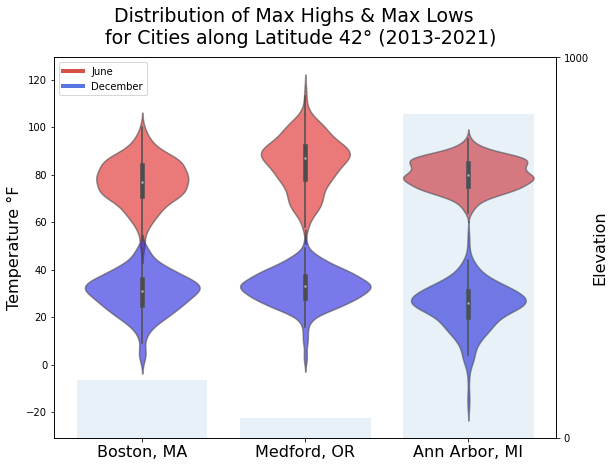

In [84]:
font = {'family': 'sans-serif',
        'weight': 'normal',
        'size': 16,
        }

fig, ax1 = plt.subplots(figsize=(9,7))

ax1 = sns.violinplot(data=june_merged, color='red', label='june')
ax1 = sns.violinplot(data=december_merged, alpha=.2, color='blue')
ax1.set_ylabel('Temperature °F', fontdict=font)
plt.setp(ax1.collections, alpha=.6)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Elevation',fontdict=font)
ax2.bar([0,1,2], [151,52,850], alpha=.1, zorder=-0)
ax2.set_yticks([0,1000])

for axis in plt.gcf().get_axes():
  axis.set_xticklabels(['Boston, MA', 'Medford, OR','Ann Arbor, MI'], fontdict=font)

fig.suptitle('Distribution of Max Highs & Max Lows \n for Cities along Latitude 42° (2013-2021)', fontsize='19')

#legend setup
from matplotlib.lines import Line2D
cmap = plt.cm.coolwarm
custom_lines = [Line2D([0], [0], color=cmap(.9), lw=4),
                Line2D([0], [0], color=cmap(0.1), lw=4)]

ax1.legend(custom_lines, ['June', 'December'], loc=2)

plt.savefig('/content/drive/MyDrive/resources/Course2/Latitude42-violin.png')
plt.show()